# Author: Vyas Kumar
# GRIP @ The Sparks Foundation
# Data Science & Business Analytics intern
# Batch: April 2024
# Project: Prediction using Decision Tree Algorithm (Level - Intermediate)

## Task: Create the Decision tree classifier and visualize it graphically

### Importing Important Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing data set

In [50]:
data=pd.read_csv("Iris.csv")

In [51]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Droping Unnecessary Column

In [53]:
data=data.drop("Id",axis=1)

In [54]:
data.shape

(150, 5)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [57]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Encoding Species Column

In [58]:
data["Species"]=data["Species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [59]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
data.Species.unique()

array([0, 1, 2], dtype=int64)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Spliting dataset into x and y as features and label

In [62]:
X=data.drop(columns=["Species"],axis=1)

In [63]:
Y=data["Species"]

In [64]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### Split dataset into train and test sets

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

### Decision Tree Algorithm

In [67]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create Decisiom Tree Classifier Object
classifier=DecisionTreeClassifier()

In [68]:
# Train Decision Tree Classifier
classifier=classifier.fit(X_train,y_train)
classifier

DecisionTreeClassifier()

### Prediction

In [69]:
classifier_pred=classifier.predict(X_test)
classifier_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0], dtype=int64)

### Constructing Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classifier_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### Visualizing the Decision Tree

In [71]:
from sklearn import tree

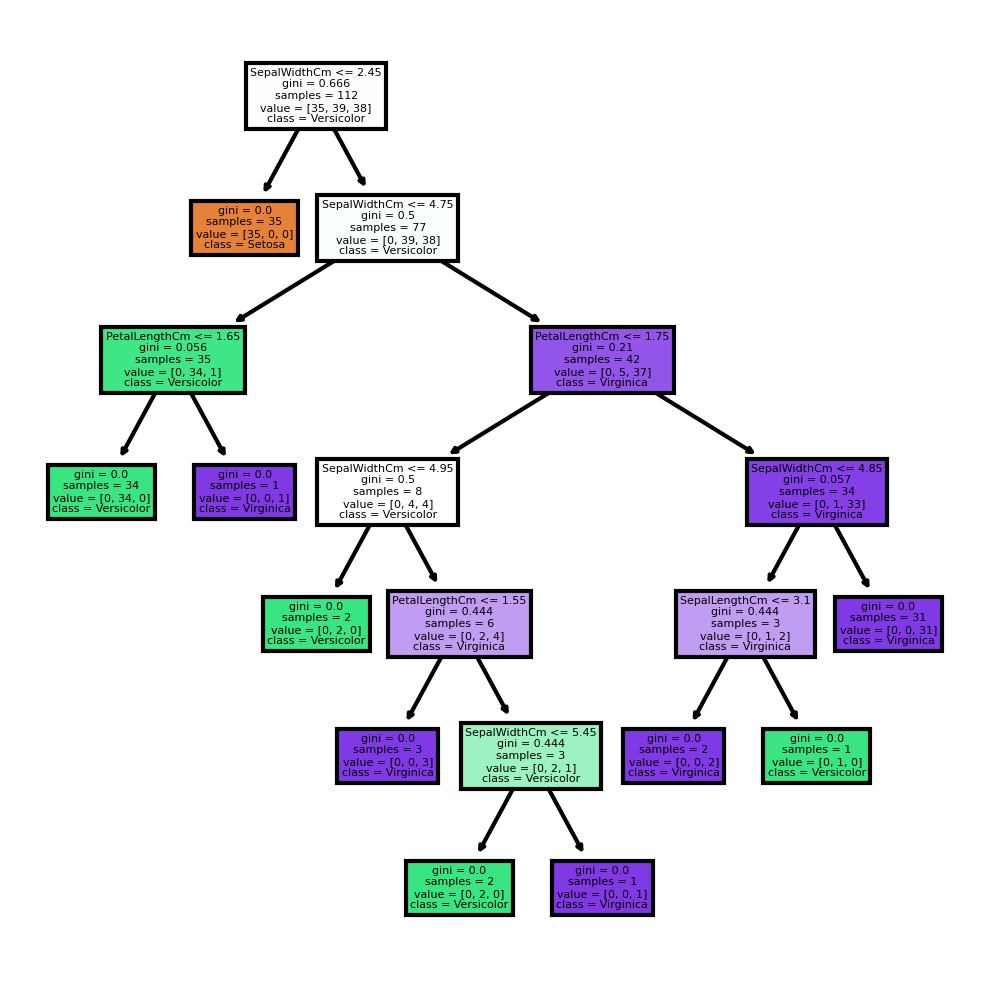

In [74]:
features=["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
label=["Setosa","Versicolor","Virginica"]

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(classifier, feature_names = features, class_names = label, filled = True);